In [1]:
import os
import glob
import pandas as pd

# Combining Green&Sustainability comments after 2020

In [105]:
a = pd.read_csv("Green-comments-after2020.csv")
b = pd.read_csv("sustainability-comments-after2020.csv")

In [109]:
merged = pd.concat([a,b],ignore_index=True)

In [110]:
merged.head()

id submission_id                                               body  \
0  ffidx2m        etp02h  Serious question here.... why isn't the CBC ar...   
1  ffizwc8        etp02h  Never heard of them, but I do note every post ...   
2  ffjgg9k        etp02h                                 So a spammer then.   
3  fhcvwgt        euu2k0  From what I've heard about Teslas, they handle...   
4  ffulzcx        ev66jd  The article notes the environmental devastatio...   

   created_utc   parent_id                                          permalink  
0   1579971556   t3_etp02h  /r/Green/comments/etp02h/greta_thunberg_brushe...  
1   1579986861  t1_ffidx2m  /r/Green/comments/etp02h/greta_thunberg_brushe...  
2   1579997722  t1_ffizwc8  /r/Green/comments/etp02h/greta_thunberg_brushe...  
3   1581471961   t3_euu2k0  /r/Green/comments/euu2k0/busting_3_myths_about...  
4   1580244778   t3_ev66jd  /r/Green/comments/ev66jd/why_developing_enviro...

In [116]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58057 entries, 0 to 58056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             58057 non-null  object
 1   submission_id  58057 non-null  object
 2   body           58057 non-null  object
 3   created_utc    58057 non-null  int64 
 4   parent_id      58057 non-null  object
 5   permalink      58057 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


In [117]:
df=merged.copy()

Exception ignored in: <function tqdm.__del__ at 0x0000023FCAB91790>
Traceback (most recent call last):
  File "C:\Users\Naim Cavin\anaconda3\lib\site-packages\tqdm\std.py", line 1134, in __del__
    self.close()
  File "C:\Users\Naim Cavin\anaconda3\lib\site-packages\tqdm\notebook.py", line 280, in close
    self.disp(bar_style='danger')
AttributeError: 'tqdm' object has no attribute 'disp'


<AxesSubplot:>

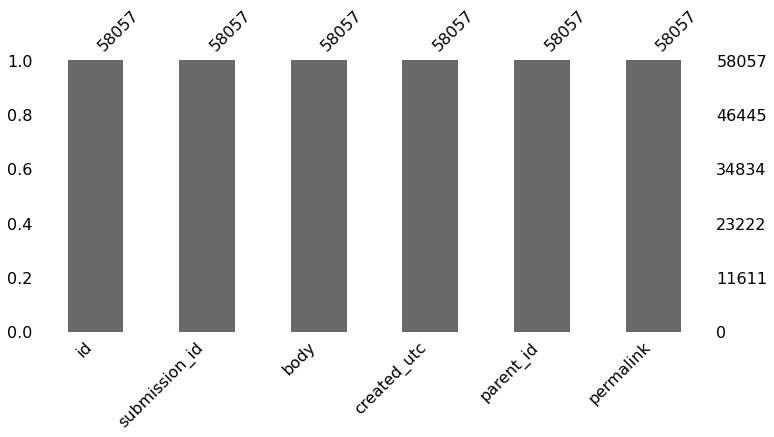

In [118]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import missingno as msno
msno.bar(df, figsize=(12, 5))

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58057 entries, 0 to 58056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             58057 non-null  object
 1   submission_id  58057 non-null  object
 2   body           58057 non-null  object
 3   created_utc    58057 non-null  int64 
 4   parent_id      58057 non-null  object
 5   permalink      58057 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


## Removing duplicates

So as you see below, we will remove 2632 duplicates. HOWEVER, these duplicates are not just similar text BUT they are "[deleted]", "[removed]", and bot users

In [125]:
duplicate = df[df["body"].duplicated()]
print(len(duplicate))
duplicate.head()

2632


id submission_id                                               body  \
48  fh7bobq        f0s4pn                                          [deleted]   
49  fh7c6oy        f0s4pn                                          [deleted]   
50  fh0nedo        f0s4pn                                          [deleted]   
55  fh7by6x        f0s4pn                                          [deleted]   
65  fh5mir5        f1h25c  Sorry, your submission has been automatically ...   

    created_utc   parent_id                                          permalink  
48   1581323508  t1_fh2d1t6  /r/Green/comments/f0s4pn/trump_named_worst_pre...  
49   1581324229  t1_fh2d8s8  /r/Green/comments/f0s4pn/trump_named_worst_pre...  
50   1581205637  t1_fh069db  /r/Green/comments/f0s4pn/trump_named_worst_pre...  
55   1581323894  t1_fh2d5sd  /r/Green/comments/f0s4pn/trump_named_worst_pre...  
65   1581290340   t3_f1h25c  /r/Green/comments/f1h25c/living_ethically_supe...

In [121]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 48 to 57958
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2632 non-null   object
 1   submission_id  2632 non-null   object
 2   body           2632 non-null   object
 3   created_utc    2632 non-null   int64 
 4   parent_id      2632 non-null   object
 5   permalink      2632 non-null   object
dtypes: int64(1), object(5)
memory usage: 143.9+ KB


## Removing unnecessary rows "[deleted]"

In [126]:
df[df["body"]=="[deleted]"]

id submission_id       body  created_utc   parent_id  \
43     fgz3j1g        f0s4pn  [deleted]   1581190341   t3_f0s4pn   
48     fh7bobq        f0s4pn  [deleted]   1581323508  t1_fh2d1t6   
49     fh7c6oy        f0s4pn  [deleted]   1581324229  t1_fh2d8s8   
50     fh0nedo        f0s4pn  [deleted]   1581205637  t1_fh069db   
55     fh7by6x        f0s4pn  [deleted]   1581323894  t1_fh2d5sd   
...        ...           ...        ...          ...         ...   
57182  hq8j5lk        rpqqzz  [deleted]   1640664222  t1_hq7cd0m   
57260  hqcrdem        rqsv0m  [deleted]   1640741701  t1_hqchtje   
57545  hqxv0wb        ru09ci  [deleted]   1641136041   t3_ru09ci   
57603  hqxvojg        ru09ci  [deleted]   1641136360  t1_hqxv61u   
57892  hr8jlth        rvza9s  [deleted]   1641317478   t3_rvza9s   

                                               permalink  
43     /r/Green/comments/f0s4pn/trump_named_worst_pre...  
48     /r/Green/comments/f0s4pn/trump_named_worst_pre...  
49     /r/Green/comments/f0s4pn/trump_named_worst_pre...  
50     /r/Green/comments/f0s4pn/trump_named_worst_pre...  
55     /r/Green/comments/f0s4pn/trump_named_worst_pre...  
...                                                  ...  
57182  /r/sustainability/comments/rpqqzz/sustainabili...  
57260  /r/sustainability/comments/rqsv0m/or_universit...  
57545  /r/sustainability/comments/ru09ci/carbon_tunne...  
57603  /r/sustainability/comments/ru09ci/carbon_tunne...  
57892  /r/sustainability/comments/rvza9s/home_meet_yo...  

[910 rows x 6 columns]

In [127]:
freefromdeleted= df[df["body"]=="[deleted]"].dropna()

In [128]:
print(freefromdeleted.shape)
freefromdeleted.head()

(910, 6)


id submission_id       body  created_utc   parent_id  \
43  fgz3j1g        f0s4pn  [deleted]   1581190341   t3_f0s4pn   
48  fh7bobq        f0s4pn  [deleted]   1581323508  t1_fh2d1t6   
49  fh7c6oy        f0s4pn  [deleted]   1581324229  t1_fh2d8s8   
50  fh0nedo        f0s4pn  [deleted]   1581205637  t1_fh069db   
55  fh7by6x        f0s4pn  [deleted]   1581323894  t1_fh2d5sd   

                                            permalink  
43  /r/Green/comments/f0s4pn/trump_named_worst_pre...  
48  /r/Green/comments/f0s4pn/trump_named_worst_pre...  
49  /r/Green/comments/f0s4pn/trump_named_worst_pre...  
50  /r/Green/comments/f0s4pn/trump_named_worst_pre...  
55  /r/Green/comments/f0s4pn/trump_named_worst_pre...

In [129]:
df1=df.copy()

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58057 entries, 0 to 58056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             58057 non-null  object
 1   submission_id  58057 non-null  object
 2   body           58057 non-null  object
 3   created_utc    58057 non-null  int64 
 4   parent_id      58057 non-null  object
 5   permalink      58057 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


In [131]:
df1 = df1.loc[df1["body"] != "[deleted]"]
df1.shape

(57147, 6)

In [132]:
df1.head()

id submission_id                                               body  \
0  ffidx2m        etp02h  Serious question here.... why isn't the CBC ar...   
1  ffizwc8        etp02h  Never heard of them, but I do note every post ...   
2  ffjgg9k        etp02h                                 So a spammer then.   
3  fhcvwgt        euu2k0  From what I've heard about Teslas, they handle...   
4  ffulzcx        ev66jd  The article notes the environmental devastatio...   

   created_utc   parent_id                                          permalink  
0   1579971556   t3_etp02h  /r/Green/comments/etp02h/greta_thunberg_brushe...  
1   1579986861  t1_ffidx2m  /r/Green/comments/etp02h/greta_thunberg_brushe...  
2   1579997722  t1_ffizwc8  /r/Green/comments/etp02h/greta_thunberg_brushe...  
3   1581471961   t3_euu2k0  /r/Green/comments/euu2k0/busting_3_myths_about...  
4   1580244778   t3_ev66jd  /r/Green/comments/ev66jd/why_developing_enviro...

In [133]:
df1= pd.DataFrame(df1, columns = ["id", "body"])

In [134]:
df1.head()

id                                               body
0  ffidx2m  Serious question here.... why isn't the CBC ar...
1  ffizwc8  Never heard of them, but I do note every post ...
2  ffjgg9k                                 So a spammer then.
3  fhcvwgt  From what I've heard about Teslas, they handle...
4  ffulzcx  The article notes the environmental devastatio...

In [32]:
from pandas_profiling import ProfileReport

In [33]:
profile = ProfileReport(df1)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Removing unnecessary rows "[removed]"

In [135]:
df1 = df1.loc[df1["body"] != "[removed]"]
df1.shape

(56299, 2)

In [43]:
profile = ProfileReport(df1)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Removing bots

In [136]:
# most frequent value in a pandas column
df1["body"].value_counts().idxmax()

'Sorry, your submission has been automatically removed. Account age too young, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*'

In [137]:
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Account age too young, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1.shape

(56196, 2)

In [138]:
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Not enough comment karma, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1.shape

(56137, 2)

In [139]:
# most frequent value in a pandas column
df1["body"].value_counts().idxmax()

'Thank you!'

In [140]:
df1 = df1.loc[df1["body"] != "Thank you!"]
df1.shape

(56090, 2)

In [141]:
# most frequent value in a pandas column
df1["body"].value_counts().idxmax()

'Thanks!'

In [142]:
df1 = df1.loc[df1["body"] != 'Thanks!']
df1.shape

(56060, 2)

In [143]:
# most frequent value in a pandas column
df1["body"].value_counts().idxmax()

'No'

In [144]:
df1 = df1.loc[df1["body"] != 'No']
df1.shape

(56044, 2)

In [145]:
# most frequent value in a pandas column
df1["body"].value_counts().idxmax()

'No.'

In [146]:
df1 = df1.loc[df1["body"] != 'No.']
df1.shape

(56030, 2)

In [147]:
# most frequent value in a pandas column
df1["body"].value_counts().idxmax()

'/r/Green does not allow image submissions.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*'

In [148]:
df1 = df1.loc[df1["body"] != '/r/Green does not allow image submissions.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*']
df1.shape

(56016, 2)

In [73]:
profile = ProfileReport(df1)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [149]:
# most frequent value in a pandas column
df1["body"].value_counts().idxmax()

'Agreed'

In [150]:
df1 = df1.loc[df1["body"] != 'Agreed']
df1.shape

(56003, 2)

In [151]:
# most frequent value in a pandas column
df1["body"].value_counts().idxmax()

'Thank you'

In [152]:
df1 = df1.loc[df1["body"] != 'Thank you']
df1.shape

(55990, 2)

In [153]:
df1 = df1.loc[df1["body"] != 'Yes.']
df1.shape

(55978, 2)

In [154]:
df1 = df1.loc[df1["body"] != 'Yes']
df1.shape

(55966, 2)

In [155]:
df1 = df1.loc[df1["body"] != 'Thanks']
df1.shape

(55954, 2)

In [156]:
df1 = df1.loc[df1["body"] != 'This']
df1.shape

(55945, 2)

In [158]:
df1.head()

id                                               body
0  ffidx2m  Serious question here.... why isn't the CBC ar...
1  ffizwc8  Never heard of them, but I do note every post ...
2  ffjgg9k                                 So a spammer then.
3  fhcvwgt  From what I've heard about Teslas, they handle...
4  ffulzcx  The article notes the environmental devastatio...

In [157]:
profile = ProfileReport(df1, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

So far, I have cleaned the entire data from missing values, unnecessary rows such as deleted and removed ones and also I just removed the frequently used but not added-value rows such as bot reddits. 
Moreover, I understand that Reddit data has different characteristics about not added value rows that are not simply NaN that is why purely removing NaN values is not sufficient but also I had to remove these types of rows:

1- Removed

2- Deleted

3- Sorry for.....(bots)

From now on, I will keep cleaning text itself instead of removing unnecessary rows

# Text Cleaning (Neat Text)

In [84]:
import neattext.functions as nfx

In [85]:
# This directory comes from neattext package to clean our text data.
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [161]:
df=df1.copy()

In [162]:
df.head()

id                                               body
0  ffidx2m  Serious question here.... why isn't the CBC ar...
1  ffizwc8  Never heard of them, but I do note every post ...
2  ffjgg9k                                 So a spammer then.
3  fhcvwgt  From what I've heard about Teslas, they handle...
4  ffulzcx  The article notes the environmental devastatio...

In [163]:
df= df.rename(columns={'body': 'content'})
df.head(3)

id                                            content
0  ffidx2m  Serious question here.... why isn't the CBC ar...
1  ffizwc8  Never heard of them, but I do note every post ...
2  ffjgg9k                                 So a spammer then.

In [170]:
df["content"][6]

"Check out this 30 minute talk from GOTO Berlin 2019 by Jessica Greene, software engineer at Ecosia. I've dropped the full talk bio below:\\n\\nEcosia like Google is a search engine, however we use our profits to plant trees world wide. This year we celebrated our users contributing to over 50 Million trees being planted in 15 countries from Ghana to Colombia, achieved through working with 22 individual partner projects. When the goal is to use the majority of profits to plant trees, engineering decisions need to connect the user directly to that purpose. Ecosia provides a platform that fits the users needs while allowing them to make sustainable choices and bring awareness with the tech they use.\\n\\nThis talk will discuss how Ecosia develops features that create a connection between users and the tree planting projects they fund, allowing them to feel that personal sense of achievement and participation. Let's delve into how we can build tech solutions that change the world!\\n\\n**

#### 1.1)Remove URL

In [173]:
df['content'] = df['content'].apply(nfx.remove_urls)
print(len(df["content"][6]))
df["content"][6]

1398


"Check out this 30 minute talk from GOTO Berlin 2019 by Jessica Greene, software engineer at Ecosia. I've dropped the full talk bio below:\\n\\nEcosia like Google is a search engine, however we use our profits to plant trees world wide. This year we celebrated our users contributing to over 50 Million trees being planted in 15 countries from Ghana to Colombia, achieved through working with 22 individual partner projects. When the goal is to use the majority of profits to plant trees, engineering decisions need to connect the user directly to that purpose. Ecosia provides a platform that fits the users needs while allowing them to make sustainable choices and bring awareness with the tech they use.\\n\\nThis talk will discuss how Ecosia develops features that create a connection between users and the tree planting projects they fund, allowing them to feel that personal sense of achievement and participation. Let's delve into how we can build tech solutions that change the world!\\n\\n**

#### 1.2)Remove special_characters

In [174]:
df['content'] = df['content'].apply(nfx.remove_special_characters)
print(len(df["content"][6]))
df["content"][6]

1360


'Check out this 30 minute talk from GOTO Berlin 2019 by Jessica Greene software engineer at Ecosia Ive dropped the full talk bio belownnEcosia like Google is a search engine however we use our profits to plant trees world wide This year we celebrated our users contributing to over 50 Million trees being planted in 15 countries from Ghana to Colombia achieved through working with 22 individual partner projects When the goal is to use the majority of profits to plant trees engineering decisions need to connect the user directly to that purpose Ecosia provides a platform that fits the users needs while allowing them to make sustainable choices and bring awareness with the tech they usennThis talk will discuss how Ecosia develops features that create a connection between users and the tree planting projects they fund allowing them to feel that personal sense of achievement and participation Lets delve into how we can build tech solutions that change the worldnnWhat will the audience learn 

#### 1.3)Remove Emojis

In [175]:
df['content'] = df['content'].apply(nfx.remove_emojis)
print(len(df["content"][6]))
df["content"][6]

1360


'Check out this 30 minute talk from GOTO Berlin 2019 by Jessica Greene software engineer at Ecosia Ive dropped the full talk bio belownnEcosia like Google is a search engine however we use our profits to plant trees world wide This year we celebrated our users contributing to over 50 Million trees being planted in 15 countries from Ghana to Colombia achieved through working with 22 individual partner projects When the goal is to use the majority of profits to plant trees engineering decisions need to connect the user directly to that purpose Ecosia provides a platform that fits the users needs while allowing them to make sustainable choices and bring awareness with the tech they usennThis talk will discuss how Ecosia develops features that create a connection between users and the tree planting projects they fund allowing them to feel that personal sense of achievement and participation Lets delve into how we can build tech solutions that change the worldnnWhat will the audience learn 

#### 1.4)Remove Emails

In [176]:
df['content'] = df['content'].apply(nfx.remove_emails)
print(len(df["content"][6]))
df["content"][6]

1360


'Check out this 30 minute talk from GOTO Berlin 2019 by Jessica Greene software engineer at Ecosia Ive dropped the full talk bio belownnEcosia like Google is a search engine however we use our profits to plant trees world wide This year we celebrated our users contributing to over 50 Million trees being planted in 15 countries from Ghana to Colombia achieved through working with 22 individual partner projects When the goal is to use the majority of profits to plant trees engineering decisions need to connect the user directly to that purpose Ecosia provides a platform that fits the users needs while allowing them to make sustainable choices and bring awareness with the tech they usennThis talk will discuss how Ecosia develops features that create a connection between users and the tree planting projects they fund allowing them to feel that personal sense of achievement and participation Lets delve into how we can build tech solutions that change the worldnnWhat will the audience learn 

#### 1.5)Remove Punctuation

In [177]:
df['content'] = df['content'].apply(nfx.remove_puncts)
print(len(df["content"][6]))
df["content"][6]

1360


'Check out this 30 minute talk from GOTO Berlin 2019 by Jessica Greene software engineer at Ecosia Ive dropped the full talk bio belownnEcosia like Google is a search engine however we use our profits to plant trees world wide This year we celebrated our users contributing to over 50 Million trees being planted in 15 countries from Ghana to Colombia achieved through working with 22 individual partner projects When the goal is to use the majority of profits to plant trees engineering decisions need to connect the user directly to that purpose Ecosia provides a platform that fits the users needs while allowing them to make sustainable choices and bring awareness with the tech they usennThis talk will discuss how Ecosia develops features that create a connection between users and the tree planting projects they fund allowing them to feel that personal sense of achievement and participation Lets delve into how we can build tech solutions that change the worldnnWhat will the audience learn 

#### 1.6)Remove Stopwords

In [178]:
df['content'] = df['content'].apply(nfx.remove_stopwords)
print(len(df["content"][6]))
df["content"][6]

960


'Check 30 minute talk GOTO Berlin 2019 Jessica Greene software engineer Ecosia Ive dropped talk bio belownnEcosia like Google search engine use profits plant trees world wide year celebrated users contributing 50 Million trees planted 15 countries Ghana Colombia achieved working 22 individual partner projects goal use majority profits plant trees engineering decisions need connect user directly purpose Ecosia provides platform fits users needs allowing sustainable choices bring awareness tech usennThis talk discuss Ecosia develops features create connection users tree planting projects fund allowing feel personal sense achievement participation Lets delve build tech solutions change worldnnWhat audience learn talk nThe audience learn work Ecosia connect users real world impact use search engine everyday tech solutions combating climate changennDoes feature code examples andor live coding nPossibly small code examples slide live coding running code'

#### 1.7)Remove Numbers

In [179]:
df['content'] = df['content'].apply(nfx.remove_numbers)
print(len(df["content"][6]))
df["content"][6]

948


'Check  minute talk GOTO Berlin  Jessica Greene software engineer Ecosia Ive dropped talk bio belownnEcosia like Google search engine use profits plant trees world wide year celebrated users contributing  Million trees planted  countries Ghana Colombia achieved working  individual partner projects goal use majority profits plant trees engineering decisions need connect user directly purpose Ecosia provides platform fits users needs allowing sustainable choices bring awareness tech usennThis talk discuss Ecosia develops features create connection users tree planting projects fund allowing feel personal sense achievement participation Lets delve build tech solutions change worldnnWhat audience learn talk nThe audience learn work Ecosia connect users real world impact use search engine everyday tech solutions combating climate changennDoes feature code examples andor live coding nPossibly small code examples slide live coding running code'

#### 1.8)Lowering the case

In [180]:
df["content"]= df["content"].apply(lambda x: x.lower())
df["content"][6]

'check  minute talk goto berlin  jessica greene software engineer ecosia ive dropped talk bio belownnecosia like google search engine use profits plant trees world wide year celebrated users contributing  million trees planted  countries ghana colombia achieved working  individual partner projects goal use majority profits plant trees engineering decisions need connect user directly purpose ecosia provides platform fits users needs allowing sustainable choices bring awareness tech usennthis talk discuss ecosia develops features create connection users tree planting projects fund allowing feel personal sense achievement participation lets delve build tech solutions change worldnnwhat audience learn talk nthe audience learn work ecosia connect users real world impact use search engine everyday tech solutions combating climate changenndoes feature code examples andor live coding npossibly small code examples slide live coding running code'

In [320]:
print(len(df["content"][6]))

948


In [192]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55945 entries, 0 to 58056
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      55945 non-null  object
 1   body    55945 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [194]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

***As can be seen from the pandas profiling, there are 537 empty texts after cleaning steps. Hence, removing these column will increase the speed for the next steps.***

In [196]:
df[df["content"]==""]

id content
139    fj1tcxq        
179    fjo9y3j        
184    fjq8xuc        
185    fjuawz8        
203    fw8yzcm        
...        ...     ...
57743  hr5o0kc        
57751  hr1b9ft        
57752  hr1bape        
57952  hrdg207        
57991  hrgl3zy        

[537 rows x 2 columns]

In [197]:
df.shape

(55945, 2)

In [199]:
df = df.loc[df["content"] != ""]
df.shape

(55408, 2)

In [200]:
df["content"].value_counts().idxmax()

'thank'

In [201]:
df = df.loc[df["content"] != 'thank']
df.shape

(55305, 2)

In [202]:
df["content"].value_counts().idxmax()

'thanks'

In [203]:
df = df.loc[df["content"] != 'thanks']
df.shape

(55240, 2)

In [204]:
df["content"].value_counts().idxmax()

'yes'

In [205]:
df = df.loc[df["content"] != 'yes']
df.shape

(55211, 2)

In [207]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Text Cleaning (Texthero)

Reference: https://yourdataguy.org/simple-and-easy-way-to-preprocess-your-text-data-using-texthero/

In [184]:
!pip install texthero

     ---------------------------------------- 24.2/24.2 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 235.7/235.7 KB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2


In [183]:
df2=df1.copy()
df2.head(3)

id                                               body
0  ffidx2m  Serious question here.... why isn't the CBC ar...
1  ffizwc8  Never heard of them, but I do note every post ...
2  ffjgg9k                                 So a spammer then.

The real selling point of the texthero library is its simplified preprocessing pipeline. Can’t remember regex syntax? Texthero has you covered! Simply call the .clean() method and pass the dataframe series:

In [185]:
import texthero as hero

In [208]:
dir(hero)

['Callable',
 'CountVectorizer',
 'Counter',
 'DBSCAN',
 'KMeans',
 'List',
 'MeanShift',
 'NMF',
 'Optional',
 'PCA',
 'PhrasesTransformer',
 'PorterStemmer',
 'Set',
 'SnowballStemmer',
 'TSNE',
 'TfidfVectorizer',
 'Word2Vec',
 'WordCloud',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'clean',
 'cosine_similarity',
 'dbscan',
 'drop_no_content',
 'fillna',
 'get_default_pipeline',
 'has_content',
 'kmeans',
 'logging',
 'lowercase',
 'lsg',
 'meanshift',
 'most_similar',
 'named_entities',
 'nlp',
 'nmf',
 'noun_chunks',
 'np',
 'pca',
 'pd',
 'plt',
 'preprocessing',
 'px',
 're',
 'remove_angle_brackets',
 'remove_brackets',
 'remove_curly_brackets',
 'remove_diacritics',
 'remove_digits',
 'remove_html_tags',
 'remove_punctuation',
 'remove_round_brackets',
 'remove_square_brackets',
 'remove_stopwords',
 'remove_urls',
 'remove_whitespace',
 'replace_digits',
 'replace_punctuation',
 'replace_stop

In [186]:
df2 = df2.rename(columns={'body': 'content'})
df2.head(3)

id                                            content
0  ffidx2m  Serious question here.... why isn't the CBC ar...
1  ffizwc8  Never heard of them, but I do note every post ...
2  ffjgg9k                                 So a spammer then.

In [187]:
df2['content'] = hero.clean(df2['content'])

In [189]:
print(len(df2["content"][6]))
df2['content'][6]

955


'check minute talk goto berlin jessica greene software engineer ecosia dropped full talk bio \\n\\necosia like google search engine however use profits plant trees world wide year celebrated users contributing million trees planted countries ghana colombia achieved working individual partner projects goal use majority profits plant trees engineering decisions need connect user directly purpose ecosia provides platform fits users needs allowing make sustainable choices bring awareness tech use \\n\\nthis talk discuss ecosia develops features create connection users tree planting projects fund allowing feel personal sense achievement participation let delve build tech solutions change world \\n\\n audience learn talk \\nthe audience learn work ecosia connect users real world impact use search engine everyday tech solutions used combating climate change \\n\\n feature code examples live coding \\npossibly small code examples slide live coding running code'

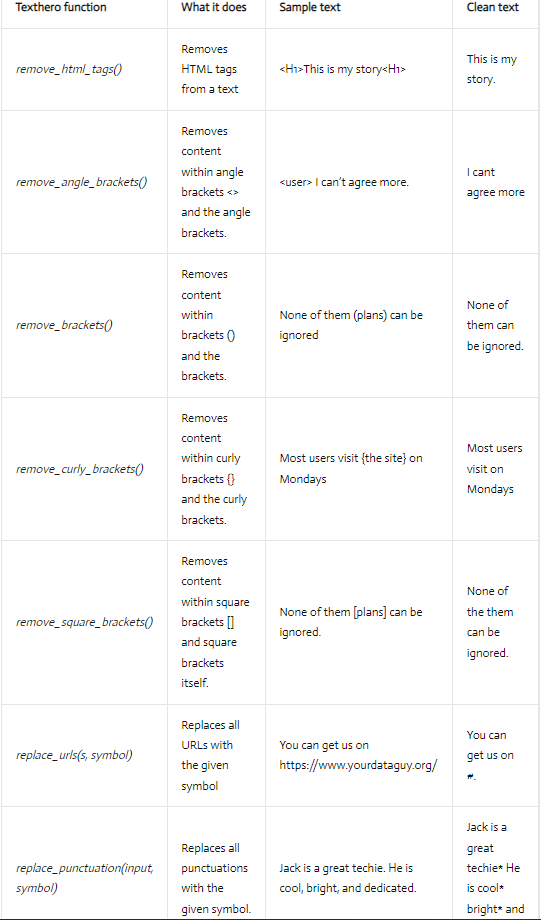

***As can be seen from above texthero library doesn't give as good result as neattext library.***

***Another side of texxthero library is visualization. In this sense, I compared the top words extracted from texthero itself and neattext library. As a result of this comparison, neattext returns healthier output.***

### The below chart is the result of NEATTEXT

In [211]:
tw = hero.visualization.top_words(df['content']).head(20)
import plotly.express as px
fig = px.bar(tw)
fig.show()
tw.head()

people    11725
like      11253
dont       9644
think      6936
im         6899
Name: content, dtype: int64

### The below chart is the result of TEXTHERO

In [212]:
tw = hero.visualization.top_words(df2['content']).head(20)
import plotly.express as px
fig = px.bar(tw)
fig.show()
tw.head()

'         20449
people    12142
like      11375
would      9965
https      7947
Name: content, dtype: int64

In [215]:
profile = ProfileReport(df2, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [216]:
# most frequent value in a pandas column
df2["content"].value_counts().idxmax()

''

In [217]:
df2.shape

(55945, 2)

In [219]:
df2 = df2.loc[df2["content"] != ""]
df2.shape

(55677, 2)

In [220]:
# most frequent value in a pandas column
df2["content"].value_counts().idxmax()

'thank'

In [221]:
df2 = df2.loc[df2["content"] != 'thank']
df2.shape

(55603, 2)

In [222]:
# most frequent value in a pandas column
df2["content"].value_counts().idxmax()

'thanks'

In [223]:
df2 = df2.loc[df2["content"] != 'thanks']
df2.shape

(55547, 2)

In [224]:
# most frequent value in a pandas column
df2["content"].value_counts().idxmax()

'yes'

In [225]:
df2 = df2.loc[df2["content"] != 'yes']
df2.shape

(55521, 2)

In [227]:
profile = ProfileReport(df2, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Text Cleaning (NLTK- CleanText package)

In [230]:
!pip install cleantext

In [231]:
import cleantext

In [233]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [240]:
cleantext.clean("Your s$ample !!!! tExt3% to   cleaN566556+2+59*/133 wiLL GO he123re") 

'sampl text clean go'

In [239]:
cleantext.clean_words('Your s$ample !!!! tExt3% to   cleaN566556+2+59*/133 wiLL GO he123re')

['sampl', 'text', 'clean', 'go']

In [288]:
df3 = df1.copy()

In [289]:
df3.shape

(55945, 2)

In [290]:
df3 = df3.rename(columns={'body': 'content'})
df3.head(3)

id                                            content
0  ffidx2m  Serious question here.... why isn't the CBC ar...
1  ffizwc8  Never heard of them, but I do note every post ...
2  ffjgg9k                                 So a spammer then.

In [291]:
df3["content2"] = df3["content"].apply(cleantext.clean)

In [292]:
df3.head()

id                                            content  \
0  ffidx2m  Serious question here.... why isn't the CBC ar...   
1  ffizwc8  Never heard of them, but I do note every post ...   
2  ffjgg9k                                 So a spammer then.   
3  fhcvwgt  From what I've heard about Teslas, they handle...   
4  ffulzcx  The article notes the environmental devastatio...   

                                            content2  
0  seriou question isnt cbc articl post hell ecop...  
1  never heard note everi post umycojohn link lea...  
2                                            spammer  
3  ive heard tesla handl fast charg much better s...  
4  articl note environment devast lithium end ca ...

In [284]:
cleantext.clean_words("Your s$ample !!!! tExt3% to   cleaN566556+2+59*/133 wiLL GO he123re",
                      clean_all= False, # Execute all cleaning operations
                      extra_spaces=True,# Remove extra white spaces 
                      stemming=False, # Stem the words
                      stopwords=True,# Remove stop words
                      lowercase=True,# Convert to lowercase
                      numbers=True,# Remove all digits 
                      punct=True,# Remove all punctuations
                      #reg: str = '<regex>', # Remove parts of text based on regex
                      reg_replace= 'email', # String to replace the regex used in reg
                      stp_lang='english'  # Language for stop words
                     )

['sample', 'text', 'clean', 'go']

In [293]:
df3["content4"] = df3["content"].apply(cleantext.clean,clean_all= False, # Execute all cleaning operations
                      extra_spaces=True,# Remove extra white spaces 
                      stemming=False, # Stem the words
                      stopwords=True,# Remove stop words
                      lowercase=True,# Convert to lowercase
                      numbers=True,# Remove all digits 
                      punct=True,# Remove all punctuations
                      #reg: str = '<regex>', # Remove parts of text based on regex
                      reg_replace= 'email', # String to replace the regex used in reg
                      stp_lang='english'  # Language for stop words
                                      )

In [294]:
df3.head()

id                                            content  \
0  ffidx2m  Serious question here.... why isn't the CBC ar...   
1  ffizwc8  Never heard of them, but I do note every post ...   
2  ffjgg9k                                 So a spammer then.   
3  fhcvwgt  From what I've heard about Teslas, they handle...   
4  ffulzcx  The article notes the environmental devastatio...   

                                            content2  \
0  seriou question isnt cbc articl post hell ecop...   
1  never heard note everi post umycojohn link lea...   
2                                            spammer   
3  ive heard tesla handl fast charg much better s...   
4  articl note environment devast lithium end ca ...   

                                            content3  
0  serious question isnt cbc article posted hell ...  
1  never heard note every post umycojohn link lea...  
2                                            spammer  
3  ive heard teslas handle fast charging much bet...  
4  article notes environmental devastation lithiu...

In [261]:
tw = hero.visualization.top_words(df3['content3']).head(20)
import plotly.express as px
fig = px.bar(tw)
fig.show()
tw.head()

people    11694
like      11250
would      9893
one        7255
also       7048
Name: content3, dtype: int64

In [262]:
df3= pd.DataFrame(df3, columns = ["id", "content3"])

In [263]:
profile = ProfileReport(df3, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [265]:
df3.shape

(55945, 2)

In [264]:
# most frequent value in a pandas column
df3["content3"].value_counts().idxmax()

''

In [266]:
df3 = df3.loc[df3["content3"] != ""]
df3.shape

(55756, 2)

In [267]:
# most frequent value in a pandas column
df3["content3"].value_counts().idxmax()

'thank'

In [268]:
df3 = df3.loc[df3["content3"] != 'thank']
df3.shape

(55699, 2)

In [269]:
df3["content3"].value_counts().idxmax()

'thanks'

In [270]:
df3 = df3.loc[df3["content3"] != 'thanks']
df3.shape

(55647, 2)

In [271]:
df3["content3"].value_counts().idxmax()

'yes'

In [272]:
df3 = df3.loc[df3["content3"] != 'yes']
df3.shape

(55623, 2)

# COMPARISON

## NLTK

In [277]:
print(len(df3["content3"][6]))
df3["content3"][6]

966


'check minute talk goto berlin jessica greene software engineer ecosia ive dropped full talk bio belownnecosia like google search engine however use profits plant trees world wide year celebrated users contributing million trees planted countries ghana colombia achieved working individual partner projects goal use majority profits plant trees engineering decisions need connect user directly purpose ecosia provides platform fits users needs allowing make sustainable choices bring awareness tech usennthis talk discuss ecosia develops features create connection users tree planting projects fund allowing feel personal sense achievement participation lets delve build tech solutions change worldnnwhat audience learn talk nthe audience learn work ecosia connect users real world impact use search engine everyday tech solutions used combating climate changenndoes feature code examples andor live coding npossibly small code examples slide live coding running code'

## NEATTEXT

In [279]:
print(len(df["content"][6]))
df["content"][6]

948


'check  minute talk goto berlin  jessica greene software engineer ecosia ive dropped talk bio belownnecosia like google search engine use profits plant trees world wide year celebrated users contributing  million trees planted  countries ghana colombia achieved working  individual partner projects goal use majority profits plant trees engineering decisions need connect user directly purpose ecosia provides platform fits users needs allowing sustainable choices bring awareness tech usennthis talk discuss ecosia develops features create connection users tree planting projects fund allowing feel personal sense achievement participation lets delve build tech solutions change worldnnwhat audience learn talk nthe audience learn work ecosia connect users real world impact use search engine everyday tech solutions combating climate changenndoes feature code examples andor live coding npossibly small code examples slide live coding running code'

## TEXTHERO

In [280]:
print(len(df2["content"][6]))
df2["content"][6]

955


'check minute talk goto berlin jessica greene software engineer ecosia dropped full talk bio \\n\\necosia like google search engine however use profits plant trees world wide year celebrated users contributing million trees planted countries ghana colombia achieved working individual partner projects goal use majority profits plant trees engineering decisions need connect user directly purpose ecosia provides platform fits users needs allowing make sustainable choices bring awareness tech use \\n\\nthis talk discuss ecosia develops features create connection users tree planting projects fund allowing feel personal sense achievement participation let delve build tech solutions change world \\n\\n audience learn talk \\nthe audience learn work ecosia connect users real world impact use search engine everyday tech solutions used combating climate change \\n\\n feature code examples live coding \\npossibly small code examples slide live coding running code'

In [274]:
profile = ProfileReport(df3, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [282]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [298]:
>>> from neattext import TextCleaner,TextExtractor,TextMetrics
>>> docx = TextCleaner()
>>> docx.text = 'Your s$ample !!!! tExt3% to   cleaN566556+2+59*/133 wiLL GO he123re'
>>> docx.clean_text()

'your sample  text to   clean will go here'

In [413]:
dfx = df1.copy()

In [414]:
dfx.head(3)

id                                               body
0  ffidx2m  Serious question here.... why isn't the CBC ar...
1  ffizwc8  Never heard of them, but I do note every post ...
2  ffjgg9k                                 So a spammer then.

In [415]:
def preprocess(df):
    
    df= df.apply(nfx.remove_urls)
    df= df.apply(nfx.remove_special_characters)
    df= df.apply(nfx.remove_emojis)
    df= df.apply(nfx.remove_numbers)
    df= df.apply(nfx.remove_puncts)
    df= df.apply(nfx.remove_hashtags)
    df= df.apply(nfx.remove_currencies)
    #df= df.apply(nfx.remove_stopwords)
    df= df.apply(lambda x: x.lower())
    df= df.apply(nfx.remove_multiple_spaces)
    
    return df

In [416]:
dfx["body2"] =[each for each in preprocess(dfx["body"])]

In [417]:
dfx.head(3)

id                                               body  \
0  ffidx2m  Serious question here.... why isn't the CBC ar...   
1  ffizwc8  Never heard of them, but I do note every post ...   
2  ffjgg9k                                 So a spammer then.   

                                               body2  
0  serious question here why isnt the cbc article...  
1  never heard of them but i do note every post b...  
2                                  so a spammer then

In [420]:
print(len(dfx["body2"][0]))
dfx["body2"][0]

167


'serious question here why isnt the cbc article being posted who the hell is ecoplanetnews and why are we sending them ad revenue when cbc did the legwork on this piece'

In [421]:
dfx["body"][0]

'Serious question here.... why isn\'t the CBC article being posted? Who the hell is "ecoplanetnews" and why are we sending them ad revenue when CBC did the legwork on this piece?'

In [535]:
#replace the slang word with meaning
for i,word in enumerate(tweet_tokens):
    if word in slang_word:
        idx=slang_word.index(word)
        tweet_tokens[i]=meaning[idx]

In [498]:
tweet =" ".join(tweet_tokens)
print("After slang replacement the tweet is:-\n{}".format(tweet))

After slang replacement the tweet is:-
I enjoyd the event which took place yesteday & I lovdddd itttt ! The link to the show is http://t.co/4ftYom0i It's awesome you'll luv it #HadFun #Enjoyed Bye For Now Good Night


In [540]:
def slang (reddit):
    reddit =" ".join(tweet_tokens)
    return reddit

In [541]:
dfx["body4"] = [each for each in slang(dfx["body"])]

TypeError: sequence item 0: expected str instance, list found

In [542]:
dfx["body4"].apply(lambda x: slang(x))

TypeError: sequence item 0: expected str instance, list found

In [538]:
dfx.head()

id                                               body  \
0  ffidx2m  Serious question here.... why isn't the CBC ar...   
1  ffizwc8  Never heard of them, but I do note every post ...   
2  ffjgg9k                                 So a spammer then.   
3  fhcvwgt  From what I've heard about Teslas, they handle...   
4  ffulzcx  The article notes the environmental devastatio...   

                                               body2  \
0  serious question here why isnt the cbc article...   
1  never heard of them but i do note every post b...   
2                                  so a spammer then   
3  from what ive heard about teslas they handle f...   
4  the article notes the environmental devastatio...   

                                               body3  \
0  serious question here.... why is not the cbc a...   
1  never heard of them, but i do note every post ...   
2                                 so a spammer then.   
3  from what i have heard about teslas, they hand...   
4  the article notes the environmental devastatio...   

                                               body4  \
0  ISerious question here.... why isn't the CBC a...   
1  INever heard of them, but I do note every post...   
2  ISo a spammer then.enjoydSo a spammer then.the...   
3  IFrom what I've heard about Teslas, they handl...   
4  IThe article notes the environmental devastati...   

                                               body5  
0  Serious question here.... why isn't the CBC ar...  
1  Never heard of them, but I do note every post ...  
2                                 So a spammer then.  
3  From what I've heard about Teslas, they handle...  
4  The article notes the environmental devastatio...

In [519]:
dfx["body"][1]

'Never heard of them, but I do note every post by /u/mycojohn is a link to them, least the last dozen or so.'

## Spell Check:

In [373]:
!pip install autocorrect

     -------------------------------------- 622.8/622.8 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622381 sha256=bce0aca91d3f7917f45a594cbc5b955733f5a61e58da5fcf9540bb08b0f6929f
  Stored in directory: c:\users\naim cavin\appdata\local\pip\cache\wheels\72\b8\3b\a90246d13090e85394a8a44b78c8abf577c0766f29d6543c75
Successfully built autocorrect


In [374]:
from autocorrect import Speller
spell = Speller(lang='en')
#spell check
tweet=spell(tweet)
print("After Spell check the tweet is:-\n{}".format(tweet))

After Spell check the tweet is:-
I enjoyed the event which took place yesterday & I loved itt ! The link to the show is http://t.co/4from0i It's awesome you'll love it #Hadn #Enjoyed BF Gt


In [567]:
from autocorrect import Speller
spell = Speller(lang='en')
def spell_cor (x):
    for each in dfx["body"]:
        x = spell(str(each))
    return x

"I enjoyd the event which took place yesteday & I lovdddd itttt ! The link to the show is http://t.co/4ftYom0i It's awesome you'll luv it #HadFun #Enjoyed Bye For Now Good Night"

In [571]:
dfx["body2"] = dfx['body'].str.lower().str.split()

In [579]:
dfx["body2"][5]

['we',
 'are',
 'living',
 'in',
 'an',
 'era',
 'that',
 'battery-based',
 'devices',
 'and',
 'machines',
 'are',
 'everywhere.',
 'an',
 'eco-friendly',
 'battery',
 'which',
 "doesn't",
 'harm',
 'our',
 'environment',
 'will',
 'be',
 'a',
 'hot',
 'potato',
 'on',
 'the',
 'table',
 'soon.']

In [575]:
df = pd.DataFrame(["and this hass a spel error"], columns=["colTest"])
df.colTest.apply(lambda x: " ".join([spell(i) for i in x.split()]))

0    and this has a spell error
Name: colTest, dtype: object

In [580]:
df["colTest"] = [' '.join([spell(i) for i in x.split()]) for x in df['colTest']]

In [581]:
df

colTest
0  and this has a spell error

In [592]:
sample = dfx.sample(1000)

In [593]:
sample.head()

id                                               body  \
28555  gcxrd58  Yes, I agree. Those are huge problems we will ...   
55535  hnngwcy  Haha it’s honestly okay😂 all opinions are welc...   
39682  hhehpjg  Not really sure what exactly you are asking, b...   
28299  gcn2kfj  I used mine straight out of the freezer! As lo...   
8514   fps24ub                              Sorry about that, eh?   

                                                   body2  \
28555  [yes,, i, agree., those, are, huge, problems, ...   
55535  [haha, it’s, honestly, okay😂, all, opinions, a...   
39682  [not, really, sure, what, exactly, you, are, a...   
28299  [i, used, mine, straight, out, of, the, freeze...   
8514                          [sorry, about, that,, eh?]   

                                                   body3  \
28555  yes, i agree. those are huge problems we will ...   
55535  haha it’s honestly okay😂 all opinions are welc...   
39682  not really sure what exactly you are asking, b...   
28299  i used mine straight out of the freezer! as lo...   
8514                               sorry about that, eh?   

                                                   body4  \
28555  Yes, I agree. Those are huge problems we will ...   
55535  Haha it’s honestly okay😂 all opinions are welc...   
39682  Not really sure what exactly you are asking, b...   
28299  I used mine straight out of the freezer! As lo...   
8514                               Sorry about that, eh?   

                                                   body5  
28555  Yes, I agree. Those are huge problems we will ...  
55535  Haha it’s honestly okay😂 all opinions are welc...  
39682  Not really sure what exactly you are asking, b...  
28299  I used mine straight out of the freezer! As lo...  
8514                               Sorry about that, eh?

In [595]:
%%timeit
sample["body2"]= sample["body"].apply(lambda x: " ".join([spell(i) for i in str(x).split()]))

1min 55s ± 1.13 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [596]:
sample.head(20)

id                                               body  \
28555  gcxrd58  Yes, I agree. Those are huge problems we will ...   
55535  hnngwcy  Haha it’s honestly okay😂 all opinions are welc...   
39682  hhehpjg  Not really sure what exactly you are asking, b...   
28299  gcn2kfj  I used mine straight out of the freezer! As lo...   
8514   fps24ub                              Sorry about that, eh?   
50966  gqedhgd  Yeah, it specifically said that some signs sho...   
37181  heqab3z  We are in an age of adaptation, while I know t...   
19794  h5w17rr  You can make a body scrub. \n\n1 cup ground or...   
15647  h0vpgb6  I mean, again, if you define "vegan" in this s...   
7791   foeg3pu  That’s what I said: systems of production, dis...   
56764  hpctsj0  I used to live near their factory and saw all ...   
40860  hirzkkq  Or we can do all three - all of us will be dir...   
48188  gm1l4zs  “Domesday attitude” is not what I’m promoting,...   
51950  gsls3ie  I’m just saying your stats are off. You need t...   
41804  hk1crw4  My comment was about vegan meat and dairy alte...   
563    fmx3nkk  but you are pushing the Green Party over anyon...   
831    fswi7f1  The good news is that poison ivy is a [super b...   
16845  h2o3kh5  Thank you for the voice of reason. I'm tired o...   
1333   g7b9705  The gas to electric conversion is at the power...   
54044  gulv1kb  I’m not familiar with the London Underground s...   

                                                   body2  \
28555  Yes, I agree. Those are huge problems we will ...   
55535  Haha it’s honestly okay😂 all opinions are welc...   
39682  Not really sure what exactly you are asking, b...   
28299  I used mine straight out of the freezer! As lo...   
8514                               Sorry about that, eh?   
50966  Yeah, it specifically said that some signs sho...   
37181  We are in an age of adaptation, while I know t...   
19794  You can make a body scrub. \n\n1 cup ground or...   
15647  I mean, again, if you define "vegan" in this s...   
7791   That’s what I said: systems of production, dis...   
56764  I used to live near their factory and saw all ...   
40860  Or we can do all three - all of us will be dir...   
48188  “Domesday attitude” is not what I’m promoting,...   
51950  I’m just saying your stats are off. You need t...   
41804  My comment was about vegan meat and dairy alte...   
563    but you are pushing the Green Party over anyon...   
831    The good news is that poison ivy is a [super b...   
16845  Thank you for the voice of reason. I'm tired o...   
1333   The gas to electric conversion is at the power...   
54044  I’m not familiar with the London Underground s...   

                                                   body3  \
28555  yes, i agree. those are huge problems we will ...   
55535  haha it’s honestly okay😂 all opinions are welc...   
39682  not really sure what exactly you are asking, b...   
28299  i used mine straight out of the freezer! as lo...   
8514                               sorry about that, eh?   
50966  yeah, it specifically said that some signs sho...   
37181  we are in an age of adaptation, while i know t...   
19794  you can make a body scrub. \n\n1 cup ground or...   
15647  i mean, again, if you define "vegan" in this s...   
7791   that’s what i said: systems of production, dis...   
56764  i used to live near their factory and saw all ...   
40860  or we can do all three - all of us will be dir...   
48188  “domesday attitude” is not what i’m promoting,...   
51950  i’m just saying your stats are off. you need t...   
41804  my comment was about vegan meat and dairy alte...   
563    but you are pushing the green party over anyon...   
831    the good news is that poison ivy is a [super b...   
16845  thank you for the voice of reason. i am tired ...   
1333   the gas to electric conversion is at the power...   
54044  i’m not familiar with the london underground s...   

                                        

In [ ]:
from textblob import TextBlob

In [ ]:
sample["body2"] = sample["body"].apply(lambda txt: ''.join(textblob.TextBlob(txt).correct()))

## Contractions

In [436]:
contractions_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [558]:
cont_to_exp("What's the best way to ensure this?")

'what has / what is the best way to ensure this?'

In [464]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions_dict:
            value = contractions_dict[key]
            x = x.lower().replace(key,value)
        return x
    else:
        return x

In [465]:
dfx["body3"] =dfx["body"].apply(lambda x: cont_to_exp(x))

In [466]:
dfx.head()

id                                               body  \
0  ffidx2m  Serious question here.... why isn't the CBC ar...   
1  ffizwc8  Never heard of them, but I do note every post ...   
2  ffjgg9k                                 So a spammer then.   
3  fhcvwgt  From what I've heard about Teslas, they handle...   
4  ffulzcx  The article notes the environmental devastatio...   

                                               body2  \
0  serious question here why isnt the cbc article...   
1  never heard of them but i do note every post b...   
2                                  so a spammer then   
3  from what ive heard about teslas they handle f...   
4  the article notes the environmental devastatio...   

                                               body3  
0  serious question here.... why is not the cbc a...  
1  never heard of them, but i do note every post ...  
2                                 so a spammer then.  
3  from what i have heard about teslas, they hand...  
4  the article notes the environmental devastatio...

## Slang Words

In [ ]:
#REFERENCE: https://github.com/rishabhverma17/sms_slang_translator

In [553]:
slang_dict = {
"AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"B4N": "Bye For Now",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GG": "Good Game",
"GN": "Good Night",
"GMTA": "Great Minds Think Alike",
"GR8": "Great!",
"G9": "Genius",
"IC": "I See",
"ICQ": "I Seek you (also a chat program)",
"ILU": "ILU: I Love You",
"IMHO": "In My Honest / Humble Opinion",
"IMO": "In My Opinion",
"IOW": "In Other Words",
"IRL": "In Real Life",
"KISS": "Keep It Simple, Stupid",
"LDR": "Long Distance Relationship",
"LMAO": "Laugh My Ass Off",
"LOL": "Laughing Out Loud",
"LTNS": "Long Time No See",
"L8R": "Later",
"MTE": "My Thoughts Exactly",
"M8": "Mate",
"NRN": "No Reply Necessary",
"OIC": "Oh I See",
"PITA": "Pain In The Ass",
"PRT": "Party",
"PRW": "Parents Are Watching",
"ROFL": "Rolling On The Floor Laughing",
"ROFLOL": "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
"SK8": "Skate",
"STATS": "Your sex and age",
"ASL": "Age, Sex, Location",
"THX": "Thank You",
"TTFN": "Ta-Ta For Now!",
"TTYL": "Talk To You Later",
"U": "You",
"U2": "You Too",
"U4E": "Yours For Ever",
"WB": "Welcome Back",
"WTF": "What The Fuck",
"WTG": "Way To Go!",
"WUF": "Where Are You From?",
"W8": "Wait"
}


In [561]:
def slang(x):
    if type(x) is str:
        for key in slang_dict:
            value = slang_dict[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [562]:
slang("Hey Rishabh BRB !!")

'Hey Rishabh Be Right Back !!'